In [1]:
import pandas as pd
import numpy as np

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('data.csv')

In [41]:
df.head()

,Make,Model,Year,HP,cylinder,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10823 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               10823 non-null  object 
 1   Model              10823 non-null  object 
 2   Year               10823 non-null  int64  
 3   HP                 10823 non-null  float64
 4   cylinder           10823 non-null  float64
 5   Transmission Type  10823 non-null  object 
 6   Driven_Wheels      10823 non-null  object 
 7   highway MPG        10823 non-null  int64  
 8   city mpg           10823 non-null  int64  
 9   MSRP               10823 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.1+ KB


In [29]:
df = df.drop(['Engine Fuel Type','Popularity','Number of Doors','Vehicle Style','Vehicle Size'],axis=1)

In [5]:
df = df.rename(columns={"Engine HP":"HP","Engine Cylinders":"cylinder"})

In [30]:
df.duplicated().sum()

np.int64(269)

In [31]:
df = df.drop_duplicates()

In [32]:
df.count()

Make                 10823
Model                10823
Year                 10823
HP                   10823
cylinder             10823
Transmission Type    10823
Driven_Wheels        10823
highway MPG          10823
city mpg             10823
MSRP                 10823
dtype: int64

In [16]:
df = df.drop('Market Category',axis=1)

In [20]:
df.isna().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
HP                   69
cylinder             30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [33]:
df.dropna(inplace=True)

In [34]:
df.count()

Make                 10823
Model                10823
Year                 10823
HP                   10823
cylinder             10823
Transmission Type    10823
Driven_Wheels        10823
highway MPG          10823
city mpg             10823
MSRP                 10823
dtype: int64

<Axes: xlabel='MSRP'>

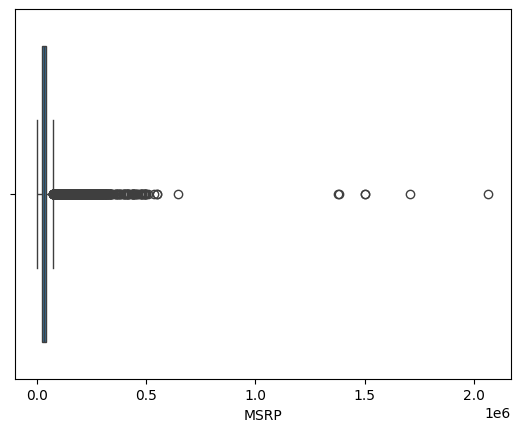

In [37]:
sns.boxplot(x=df['MSRP'])

In [38]:
# finding IQR

Q1 = df['MSRP'].quantile(0.25)
Q3 = df['MSRP'].quantile(0.75)

IQR = Q3-Q1
print(IQR)


21312.5


In [39]:
lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5

print(lower_bound , upper_bound)

-9981.25 75268.75


Text(0.5, 0, 'Company')

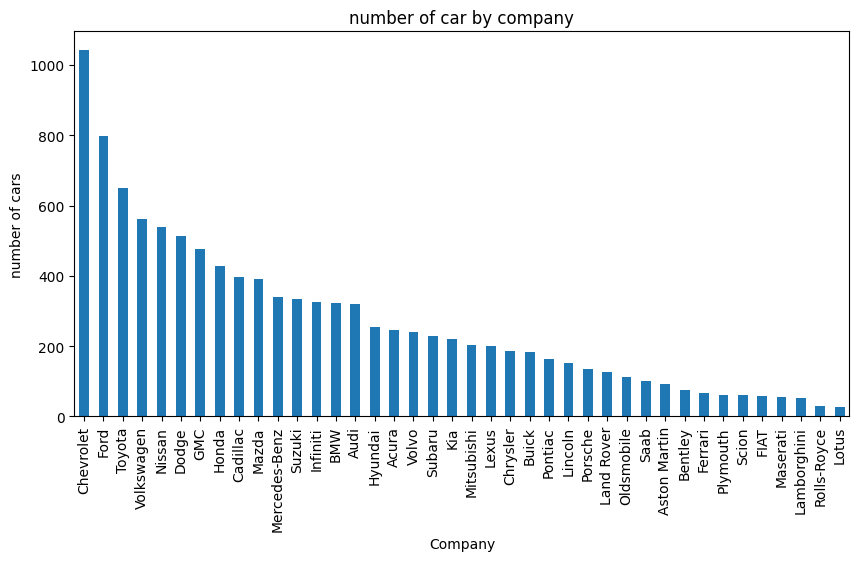

In [40]:
df.Make.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title('number of car by company')
plt.ylabel('number of cars')
plt.xlabel('Company')

In [ ]:
##df2 = df.drop(['Make','Model','Transmission Type','Vehicle Style','Vehicle Size'],axis=1)

<Axes: >

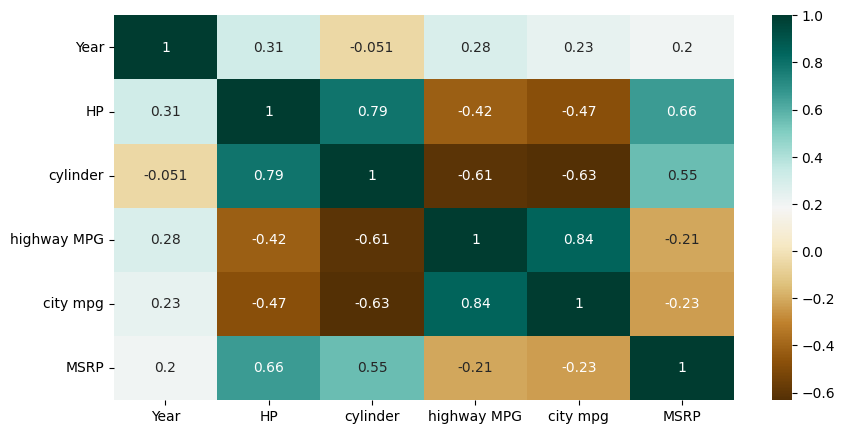

In [47]:
plt.figure(figsize=(10,5))
numeric_df = df.select_dtypes(include='number')
c = numeric_df.corr()


sns.heatmap(c,cmap='BrBG',annot=True)

## scatterplot

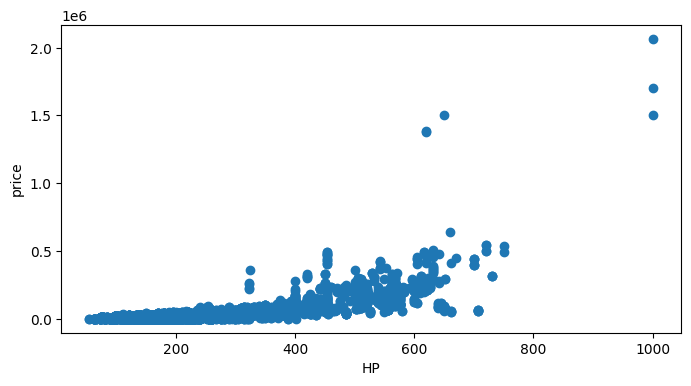

In [ ]:
fig , ax = plt.subplots(figsize=(8,4))
ax.scatter(df['HP'],df['MSRP'])
ax.set_xlabel('HP')
ax.set_ylabel('price')
plt.show()